# Introduction

Chess has been one of the most famous games to have originated from the ancient civilisations. The game is said to be about 1500 years old. It is hard to ascertain who came up with the game for the first time as different versions with identical rules were being followed at different continents and civilisations.

The precursors of the game was found to originate in 550 AD at the Gupta Empire of NorthWestern India. The game was further introduced in early day Persia from India in around 600 AD. The game was well documented through various manuscripts as it was a marvellous game especially for those who wanted to become military commanders. It was said that chess helped build a multi approach warfare ideas. Hence, the game became extremely relevant during the times when there was no status quo amongst kingdoms and wars were frequent. At around 1850, the first Chess tournament was held in US and ever since then, it has become a sport that has been featuring in various international sports competitions like the Olympics, Commonwealth games, etc.

In this particular notebook, we will try to play with the data of women chess players and understand some key insights. 

**As an Indian, it also gives me immense pleasure to announce that India has been declared as the winners of the recently concluded Chess olympiad. The match was a tie with Russia and hence, both countries were declared as joint winners. So, congratulations to the players from each camp.**

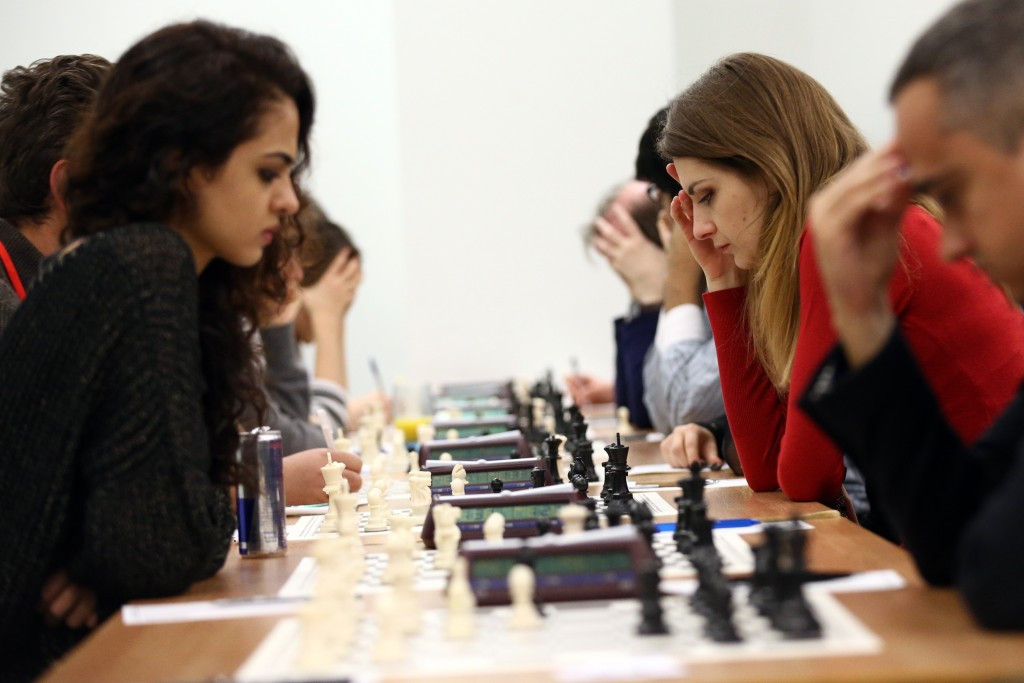

# Importing datasets and libraries

Let us start off with the usual. We shall import the required datasets and libraries first.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode (connected = True)

In [ ]:
df=pd.read_csv('../input/top-women-chess-players/top_women_chess_players_aug_2020.csv')
df.head()

# Data Cleaning

Let us check the important columns and presence of missing values if any. 

First, we will try to visualise the number of missing values in each column.

In [ ]:
sns.heatmap(df.isna(),cmap='gnuplot')

From the above figure, we can see that Year of birth, title,Rapid rating, Blitz rating and inactive_flag have a lot of null values. 

Since Fide id and Gender have no purpose in our analysis, we shall simply drop these columns.

In [ ]:
unn_cols=['Fide id','Gender']

for cols in unn_cols:
    df.drop(cols,axis=1,inplace=True)

Let us now check the datatypes available to us.

In [ ]:
df.dtypes

### Year of birth and age

Since more than year of birth, the age of the players will be of bigger concern to us, hence we shall calculate the age of each of the players as follows. There is no way of filling the empty values here. Hence, we shall simply leave it as it is.

In [ ]:
df['Age']=2020-df['Year_of_birth']

### Title

A lot of entries have null titles. This maybe assumed as new players who have not yet received an official title by FIDE which is the governing body for chess players. Hence, these null values maybe replaced by the term Unrated.

In [ ]:
df['Title']=df['Title'].fillna('Unrated')

### Ratings

We see that there are null values in rapid and blitz rating. Let us fill the null values with 0 instead since it probably indicates that the player hasn't taken part in that particular format of chess.

In [ ]:
df['Rapid_rating']=df['Rapid_rating'].fillna(0)
df['Blitz_rating']=df['Blitz_rating'].fillna(0)

### Inactive_flag

This flag indicates if the players are currently inactive for a fixed duration or longer. This could be for various reasons such as retirement or any other personal reasons. The null values indicate Active while WI indicates Inactive. We shall align the data into more readable form.

In [ ]:
df['Inactive_flag']=df['Inactive_flag'].fillna('Active')
df['Inactive_flag']=df['Inactive_flag'].replace('wi','Inactive')


# Data Visualisation

Now that all our data is cleaned, we shall move ahead with the data visualisation aspect. Let's start off with number of players from each federation.

## a) Federation

Here, we shall visualise the top 20 most represented nations in the world.

In [ ]:
df['Count']=1
df_fed=df.groupby('Federation')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)

In [ ]:
fig1=px.bar(df_fed.head(20),x='Federation',y='Count',color='Federation',labels={'Count':'Number of players'})
fig1.update_layout(template='plotly_dark',title="Top 20 most represented nations in women's Chess",title_x=0.5)
fig1.show()

From the above plot, we can see that Russia has by far the highest representation in world women's chess followed by a distant Germany in 2nd spot. Let us try to visualise it better using a Choropleth map which will show the representation of every country.

In [ ]:
map_data = [go.Choropleth( 
           locations = df_fed['Federation'],
           locationmode = 'ISO-3',
           z = df_fed["Count"], 
           text = df_fed['Federation'],
           colorbar = {'title':'No. of Players'},
           colorscale='cividis')]

layout = dict(title = 'Players per nation', title_x=0.5,
             geo = dict(showframe = False, 
                       projection = dict(type = 'equirectangular')))

world_map = go.Figure(data=map_data, layout=layout)
iplot(world_map)

As we can see from the above choropleth, Russia is very heavily represented in the Women's world chess competition. Some key points are:

* Representation from the African nations is extremely underwhelming. 
* Asia is well represented through India and China. Middle East Asian countries have decent representaiton as well. However, Far East Asian countries like Thailand, Singapore, Malaysia, Vietnam and a few more are lagging behind.
* Oceania has relatively much lower women representation from Australia and New Zealand.
* North American nations are well represented by all their countries.
* Most of the South American countries are equally represented aswell.

## b) Title

The title in Chess represents the level reached by a player. The top most position is that of a Grand Master (GM). Here is a list of all the titles that are given to players alongwith their initials.

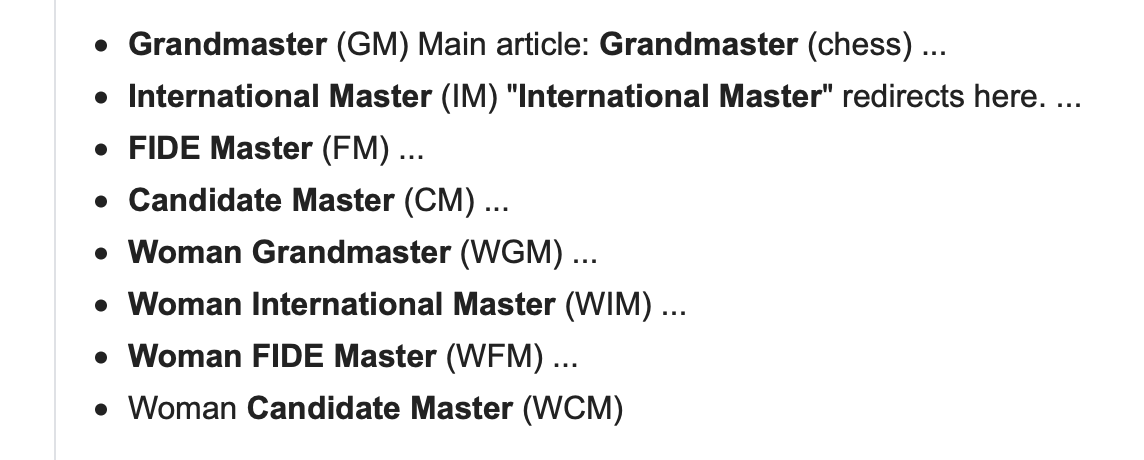


Let us check the different titles represented by the Women through a pie chart.

In [ ]:
df_title=df.groupby('Title')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
fig2=px.pie(df_title,values='Count',names='Title',hole=0.4)
fig2.update_layout(title='Title distribution of women chess players',title_x=.5,annotations=[dict(text='Title',font_size=20, 
                                                                           showarrow=False,height=800,width=700)])

As expecred, majority of the players (about 63.5%) are still unrated. This means there are a lot of players who are yet to receive an official title from FIDE. There are only 37 women Grand masters in the world. Hence, receiving a GM title is an achievement on it's own.

Let us now check the countries represented by the top women chess players. For considering the top chess players, we will consider the top 3 titles of GM, IM and FM

In [ ]:
df_top=df[df['Title'].isin(["GM","IM"])]

In [ ]:
fig3=px.sunburst(df_top,path=['Federation','Title'],names='Title')
fig3.update_layout(title="Title distribution per nation",title_x=0.5,template='plotly_white')
fig3.show()

From the plot above, we see that China has the highest number of Grand masters with 7 followed by Russia with 6 GMs. Russia however leads the number of IMs with 15 followed by Georgia with 9 IMs.

## c) Age

Let us check the distribution of the ages of the various chess players.

In [ ]:
fig4=px.histogram(df,x='Age',marginal='box')
fig4.update_layout(template='plotly_dark',title='Age distribution of women chess players',title_x=0.5)

Upon checking the age distributions, we see that majority of players are within the 20-40 age group.The median age of the players is 32. Players as young as 10 year olds are also involved in competitions while the maximum age of the player till date is 100 years old.

## d) Player activity

This indicates whether the players are currently active in chess competitions. Let us check how many players are active and how many are currently inactive.

In [ ]:
df_act=df.groupby('Inactive_flag')['Count'].sum().reset_index()
fig5=px.pie(df_act,names='Inactive_flag',values='Count',hole=0.4,color=['Purple','Red'])
fig5.update_layout(title='Activity of women Chess players',title_x=0.5,annotations=[dict(text='Activity',
                                                                                         font_size=15, showarrow=False,
                                                                                         height=800,width=700)])
fig5.update_traces(textfont_size=15,textinfo='percent+label')

fig5.show()

From the given database, we have only about 31.6% active chess players while majority have retired or haven't participated due to personal reasons.

## e) Top ratings

Let us visualise the given 3 ratings of the players using a 3D scatter plot. Let us also find the average rating of each player which will indicate who has a balance of all 3 ratings. **For our analysis, we shall only consider players who are currently active in chess competitions.**

In [ ]:
df_a=df[df['Inactive_flag']=='Active']
df_a['Average_rating']=np.round((df_a.iloc[:,4] + df_a.iloc[:,5] + df_a.iloc[:,6])/3,2)

In [ ]:
fig6=px.scatter_3d(df_a,x='Standard_Rating',y='Blitz_rating',z='Rapid_rating',
                   color='Average_rating',size='Average_rating',opacity=1,hover_data=['Name','Standard_Rating','Blitz_rating','Rapid_rating','Average_rating'])
fig6.update_layout(margin=dict(l=0, r=0, b=0.5, t=0),title='Active player rating distributions',title_x=0.5,title_y=1)
fig6.update_traces(hovertext='Name')

fig6.show()

From the 3D scatter plot, we can observe that **Yifan Hou** is the perfect player with the highest average rating of all the active players.

## f) Radar plot of top GM, IM and FM by average ratings

In the following plot, we will see how the ratings data of each of the active top GM,IM and FM players change. 




In [ ]:
df_topGM=df_a.sort_values(by='Average_rating',ascending=False).head(1)
df_topIM=df_a[df_a['Title']=='IM'].sort_values(by='Average_rating',ascending=False).head(1)
df_topFM=df_a[df_a['Title']=='FM'].sort_values(by='Average_rating',ascending=False).head(1)

cats=['Standard rating','Rapid rating','Blitz rating','Average rating']
fig7=go.Figure()
fig7.add_trace(go.Scatterpolar(r=[df_topGM.iloc[0,4],df_topGM.iloc[0,5],df_topGM.iloc[0,6],df_topGM.iloc[0,-1]],
                              theta=cats,fill='toself',name=df_topGM['Name'].values[0]+','+df_topGM['Title'].values[0]))


fig7.add_trace(go.Scatterpolar(r=[df_topIM.iloc[0,4],df_topIM.iloc[0,5],df_topIM.iloc[0,6],df_topIM.iloc[0,-1]],
                              theta=cats,fill='toself',name=df_topIM['Name'].values[0]+','+df_topIM['Title'].values[0]))

fig7.add_trace(go.Scatterpolar(r=[df_topFM.iloc[0,4],df_topFM.iloc[0,5],df_topFM.iloc[0,6],df_topFM.iloc[0,-1]],
                              theta=cats,fill='toself',name=df_topFM['Name'].values[0]+ ','+ df_topFM['Title'].values[0]))

fig7.update_layout(title='Radar plot of ratings of top GM,IM and FM',title_x=0.45)
fig7.show()

From the radar plot shown above, we see what are the differences between the top most rated GM, IM and FM. 

# If you found this notebook useful, an upvote would be amazing ! :)